In [23]:
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from functions import get_pixel_value
from functions import polarization 
from functions import allpixel
from astropy import units as u

import warnings
warnings.filterwarnings("ignore")


In [24]:
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])

In [25]:
Sky_D=pysm3.Sky(nside=64, preset_strings=["d0"])
Sky_S=pysm3.Sky(nside=64, preset_strings=["s0"])

In [26]:
map_D_I = Sky_D.get_emission(545 * u.GHz)
map_D = Sky_D.get_emission(353 * u.GHz)
map_S_I = Sky_S.get_emission(0.408 * u.GHz) 
map_S = Sky_S.get_emission(23 * u.GHz) 

In [27]:
I_D=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_D)
I_S=get_pixel_value(frequencies,npix=1,Stokes=0,sky=Sky_S)

Q_D=get_pixel_value(frequencies,npix=1,Stokes=1,sky=Sky_D)
Q_S=get_pixel_value(frequencies,npix=1,Stokes=1,sky=Sky_S)

U_D=get_pixel_value(frequencies,npix=1,Stokes=2,sky=Sky_D)
U_S=get_pixel_value(frequencies,npix=1,Stokes=2,sky=Sky_S)

In [28]:
allpixel_D,err_D=np.array(allpixel(frequencies,Stokes=0,sky=Sky_D))
allpixel_S,err_S=np.array(allpixel(frequencies,Stokes=0,sky=Sky_S))

allpixel_Q_D,err_Q_D=np.array(allpixel(frequencies,Stokes=1,sky=Sky_D))
allpixel_Q_S,err_Q_S=np.array(allpixel(frequencies,Stokes=1,sky=Sky_S))

allpixel_U_D,err_U_D=np.array(allpixel(frequencies,Stokes=2,sky=Sky_D))
allpixel_U_S,err_U_S=np.array(allpixel(frequencies,Stokes=2,sky=Sky_S))

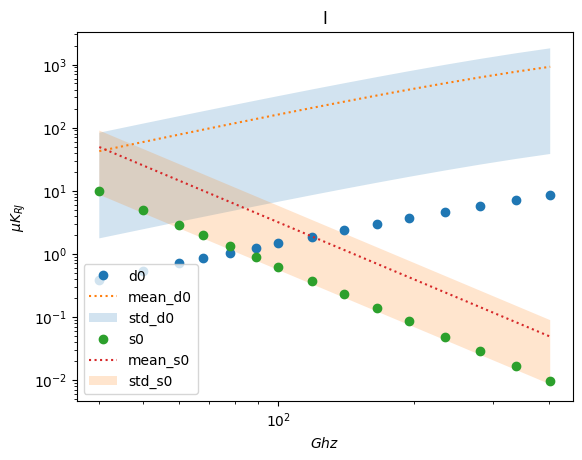

In [29]:
plt.plot(frequencies,I_D,'o',label="d0")
plt.plot(frequencies,allpixel_D,':',label="mean_d0")
plt.fill_between(frequencies,allpixel_D+err_D, allpixel_D-err_D, alpha=0.2, label="std_d0")
plt.plot(frequencies,I_S,'o',label="s0")
plt.plot(frequencies,allpixel_S,':',label="mean_s0")
plt.fill_between(frequencies, allpixel_S+err_S, allpixel_S-err_S, alpha=0.2, label="std_s0")


plt.title("I")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

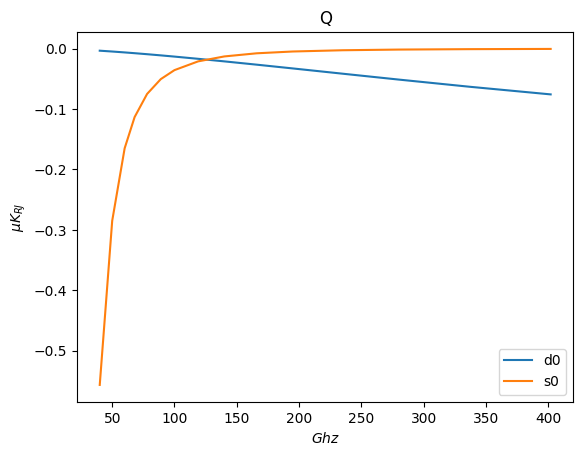

In [30]:
plt.plot(frequencies,Q_D,'-',label="d0")
plt.plot(frequencies,Q_S,'-',label="s0")
plt.title("Q")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

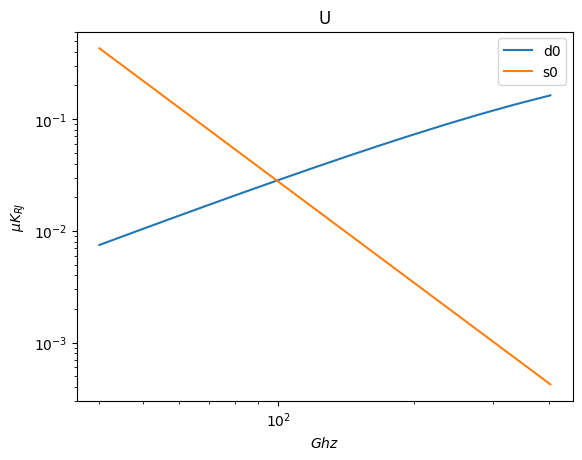

In [31]:
plt.plot(frequencies,U_D,'-',label="d0")
plt.plot(frequencies,U_S,'-',label="s0")
plt.title("U")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()

In [32]:
P_D=polarization(Q_D,U_D)
allpixel_P_D=np.array(polarization(allpixel_Q_D,allpixel_U_D))
err_P_D=np.array(polarization(err_Q_D,err_U_D))

P_S=polarization(Q_S,U_S)
allpixel_P_S=np.array(polarization(allpixel_Q_S,allpixel_U_S))
err_P_S=np.array(polarization(err_Q_S,err_U_S))



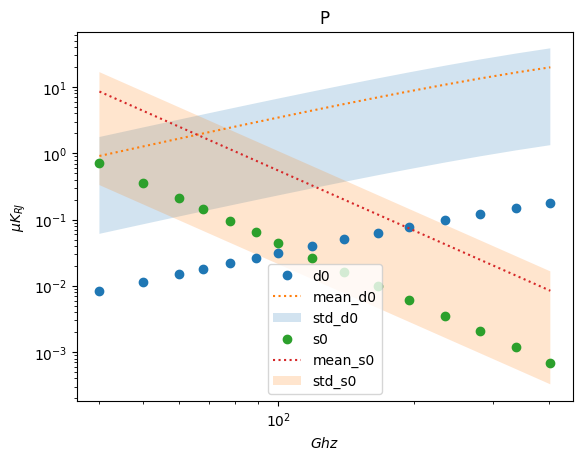

In [33]:
plt.plot(frequencies,P_D,'o',label="d0")
plt.plot(frequencies,allpixel_P_D,':',label="mean_d0")
plt.fill_between(frequencies, allpixel_P_D+err_P_D, allpixel_P_D-err_P_D, alpha=0.2, label="std_d0")
plt.plot(frequencies,P_S,'o',label="s0")
plt.plot(frequencies,allpixel_P_S,':',label="mean_s0")
plt.fill_between(frequencies, allpixel_P_S+err_P_S, allpixel_P_S-err_P_S, alpha=0.2, label="std_s0")

plt.title("P")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend()
